# Preparación de datos

In [1]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

In [2]:
spark

# Conjunto de entrenamiento

In [12]:
##
## Row representa una fila en un RDD
##
from pyspark.sql import Row
##
## Crea un DataFrame a partir del archivo con
## formato CSV
##
nombre_archivo="entrenamiento"
df = spark.read.load("D:\\CLASES\\ELECTIVA 3 BigData\\Taller_final\\"+nombre_archivo+".csv",
                     format="csv",
                     sep="|",
                     inferSchema= True,
                     encoding='UTF-8',
                     decimal=".",
                     header="true")
df.printSchema()

root
 |-- cod_alumno: integer (nullable = true)
 |-- ciudad: string (nullable = true)
 |-- sexo_f: integer (nullable = true)
 |-- puntaje_ingreso: double (nullable = true)
 |-- promedio_notas: double (nullable = true)
 |-- total_creditos_logrados: double (nullable = true)
 |-- biologia: double (nullable = true)
 |-- matematicas: double (nullable = true)
 |-- filosofia: double (nullable = true)
 |-- fisica: double (nullable = true)
 |-- historia: double (nullable = true)
 |-- quimica: double (nullable = true)
 |-- lenguaje: double (nullable = true)
 |-- geografia: double (nullable = true)
 |-- idiomas: double (nullable = true)
 |-- sociales: double (nullable = true)
 |-- lecturacritica: double (nullable = true)
 |-- ciencias: double (nullable = true)
 |-- razonamiento: double (nullable = true)
 |-- competenciaciud: double (nullable = true)
 |-- valor_matricula: double (nullable = true)
 |-- valor_servicios: double (nullable = true)
 |-- ingresos: double (nullable = true)
 |-- vive_famil

# Contar cantidad de registros

In [13]:
df.count()

4308

# Contar cantidad de registros por clase

In [14]:
df.groupby("clase").count().show()

+-----+-----+
|clase|count|
+-----+-----+
|    1| 2273|
|    0| 2035|
+-----+-----+



# Contar estudiantes por ciudad

In [15]:
df.groupby("ciudad").count().show()

+--------------------+-----+
|              ciudad|count|
+--------------------+-----+
|LA UNION         ...|   36|
|TUMACO           ...|  180|
|PASTO            ...| 3377|
|IPIALES          ...|  475|
|SAMANIEGO        ...|   40|
|TUQUERRES        ...|  200|
+--------------------+-----+



# Contar estudiantes por año

In [16]:
df.groupby("anio_reporte").count().orderBy("anio_reporte").show()

+------------+-----+
|anio_reporte|count|
+------------+-----+
|      2000.0|  211|
|      2001.0|  170|
|      2002.0|  246|
|      2003.0|  262|
|      2004.0|  229|
|      2005.0|  249|
|      2006.0|  275|
|      2007.0|  364|
|      2008.0|  296|
|      2009.0|  293|
|      2010.0|  297|
|      2011.0|  230|
|      2012.0|  230|
|      2013.0|  254|
|      2014.0|  250|
|      2015.0|  239|
|      2016.0|  213|
+------------+-----+



# Explorar valores faltantes

In [17]:
from pyspark.sql.functions import isnan, when, count, col
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'cod_alumno': 0,
 'ciudad': 0,
 'sexo_f': 0,
 'puntaje_ingreso': 134,
 'promedio_notas': 7,
 'total_creditos_logrados': 151,
 'biologia': 314,
 'matematicas': 314,
 'filosofia': 314,
 'fisica': 314,
 'historia': 314,
 'quimica': 1016,
 'lenguaje': 1016,
 'geografia': 1016,
 'idiomas': 1738,
 'sociales': 2531,
 'lecturacritica': 4133,
 'ciencias': 4133,
 'razonamiento': 4133,
 'competenciaciud': 4133,
 'valor_matricula': 1179,
 'valor_servicios': 1179,
 'ingresos': 1179,
 'vive_familia': 0,
 'estrato': 2684,
 'estrato_vivira': 2684,
 'actualmente_trabaja': 2425,
 'valor_matric_colegio': 2425,
 'ano_pago_colegio': 2671,
 'ingresos_familiares': 2425,
 'ano_ingresos': 2671,
 'numero_aportantes': 2674,
 'numero_hermanos': 2425,
 'numero_hermanos_est_superior': 2425,
 'edad_inicio': 44,
 'edad_reporte': 42,
 'anio_reporte': 0,
 'clase': 0}

In [18]:
for col_name in df.dtypes:
    df.describe(col_name[0]).show()

+-------+-------------------+
|summary|         cod_alumno|
+-------+-------------------+
|  count|               4308|
|   mean|3.430962515803157E8|
| stddev| 7.16044407783054E8|
|    min|                443|
|    max|         2141603002|
+-------+-------------------+

+-------+--------------------+
|summary|              ciudad|
+-------+--------------------+
|  count|                4308|
|   mean|                null|
| stddev|                null|
|    min|IPIALES          ...|
|    max|TUQUERRES        ...|
+-------+--------------------+

+-------+------------------+
|summary|            sexo_f|
+-------+------------------+
|  count|              4308|
|   mean|0.2212163416898793|
| stddev| 0.415114046718535|
|    min|                 0|
|    max|                 1|
+-------+------------------+

+-------+------------------+
|summary|   puntaje_ingreso|
+-------+------------------+
|  count|              4174|
|   mean| 54.18482989937723|
| stddev|14.796288112878077|
|    min|    

+-------+-----------------+
|summary|  numero_hermanos|
+-------+-----------------+
|  count|             1883|
|   mean| 1.77376526818906|
| stddev|1.752427192483819|
|    min|              0.0|
|    max|             17.0|
+-------+-----------------+

+-------+----------------------------+
|summary|numero_hermanos_est_superior|
+-------+----------------------------+
|  count|                        1883|
|   mean|          0.3908656399362719|
| stddev|          0.8439076184913674|
|    min|                         0.0|
|    max|                        13.0|
+-------+----------------------------+

+-------+------------------+
|summary|       edad_inicio|
+-------+------------------+
|  count|              4264|
|   mean|22.124765478424013|
| stddev| 71.62894002570519|
|    min|               0.0|
|    max|            1999.0|
+-------+------------------+

+-------+-----------------+
|summary|     edad_reporte|
+-------+-----------------+
|  count|             4266|
|   mean|25.941865916

# Métodos para autocompletar los valores faltantes

1 imputar valores faltantes con un cero 

In [11]:
complete_dict = dict()
for col_name in df.dtypes:
    if col_name[1]=='string':
        complete_dict[col_name[0]]="DESCONOCIDO"
    else:
        complete_dict[col_name[0]]=0    
df_ml_complete = df.na.fill(complete_dict)      


2 imputar valores faltantes con un valor fuera de rango -99

In [19]:
complete_dict = dict()
for col_name in df.dtypes:
    if col_name[1]=='string':
        complete_dict[col_name[0]]="DESCONOCIDO"
    else:
        complete_dict[col_name[0]]=-99    
df_ml_complete = df.na.fill(complete_dict)      


3 imputar valores faltantes con el promedio 

In [12]:
complete_dict = dict()
for col_name in df.dtypes:
    if col_name[1]=='string':
        complete_dict[col_name[0]]="DESCONOCIDO"
    else:
        d=df.selectExpr("avg("+col_name[0]+")").rdd.map(list)
        v=max(d.collect()[0])
        complete_dict[col_name[0]]=v   
df_ml_complete = df.na.fill(complete_dict)      

In [20]:
from pyspark.sql.functions import isnan, when, count, col
Dict_Null = {col:df_ml_complete.filter(df_ml_complete[col].isNull()).count() for col in df_ml_complete.columns}
Dict_Null

{'cod_alumno': 0,
 'ciudad': 0,
 'sexo_f': 0,
 'puntaje_ingreso': 0,
 'promedio_notas': 0,
 'total_creditos_logrados': 0,
 'biologia': 0,
 'matematicas': 0,
 'filosofia': 0,
 'fisica': 0,
 'historia': 0,
 'quimica': 0,
 'lenguaje': 0,
 'geografia': 0,
 'idiomas': 0,
 'sociales': 0,
 'lecturacritica': 0,
 'ciencias': 0,
 'razonamiento': 0,
 'competenciaciud': 0,
 'valor_matricula': 0,
 'valor_servicios': 0,
 'ingresos': 0,
 'vive_familia': 0,
 'estrato': 0,
 'estrato_vivira': 0,
 'actualmente_trabaja': 0,
 'valor_matric_colegio': 0,
 'ano_pago_colegio': 0,
 'ingresos_familiares': 0,
 'ano_ingresos': 0,
 'numero_aportantes': 0,
 'numero_hermanos': 0,
 'numero_hermanos_est_superior': 0,
 'edad_inicio': 0,
 'edad_reporte': 0,
 'anio_reporte': 0,
 'clase': 0}

In [21]:
for col_name in df_ml_complete.dtypes:
    df_ml_complete.describe(col_name[0]).show()

+-------+-------------------+
|summary|         cod_alumno|
+-------+-------------------+
|  count|               4308|
|   mean|3.430962515803157E8|
| stddev| 7.16044407783054E8|
|    min|                443|
|    max|         2141603002|
+-------+-------------------+

+-------+--------------------+
|summary|              ciudad|
+-------+--------------------+
|  count|                4308|
|   mean|                null|
| stddev|                null|
|    min|IPIALES          ...|
|    max|TUQUERRES        ...|
+-------+--------------------+

+-------+------------------+
|summary|            sexo_f|
+-------+------------------+
|  count|              4308|
|   mean|0.2212163416898793|
| stddev| 0.415114046718535|
|    min|                 0|
|    max|                 1|
+-------+------------------+

+-------+------------------+
|summary|   puntaje_ingreso|
+-------+------------------+
|  count|              4308|
|   mean|  49.4200278551533|
| stddev|30.322846240615903|
|    min|    

+-------+------------------+
|summary|   numero_hermanos|
+-------+------------------+
|  count|              4308|
|   mean|-54.95241411327763|
| stddev|50.005732768389194|
|    min|             -99.0|
|    max|              17.0|
+-------+------------------+

+-------+----------------------------+
|summary|numero_hermanos_est_superior|
+-------+----------------------------+
|  count|                        4308|
|   mean|          -55.55687093779016|
| stddev|           49.30943379900933|
|    min|                       -99.0|
|    max|                        13.0|
+-------+----------------------------+

+-------+-----------------+
|summary|      edad_inicio|
+-------+-----------------+
|  count|             4308|
|   mean|20.88765088207985|
| stddev|72.29550011354452|
|    min|            -99.0|
|    max|           1999.0|
+-------+-----------------+

+-------+-----------------+
|summary|     edad_reporte|
+-------+-----------------+
|  count|             4308|
|   mean|24.723769730

# Transformar la ciudad a Dummies

In [22]:
df_ml_complete.createOrReplaceTempView("estudiantes")
sql=("select case when trim(e.ciudad)='LA UNION' then 1 else 0 end ciudad_union,"+
     "case when trim(e.ciudad)='TUMACO' then 1 else 0 end ciudad_tumaco,"+
     "case when trim(e.ciudad)='PASTO' then 1 else 0 end ciudad_pasto,"+
     "case when trim(e.ciudad)='IPIALES' then 1 else 0 end ciudad_ipiales,"+
     "case when trim(e.ciudad)='SAMANIEGO' then 1 else 0 end ciudad_samaniego,"+
     "e.*"+
     "from estudiantes e"
    )

df_procesado=spark.sql(sql)
df_procesado=df_procesado.drop("ciudad")
df_procesado=df_procesado.drop("semestre")
df_procesado=df_procesado.drop("numero_de_materias_cursadas")
df_procesado.printSchema()

root
 |-- ciudad_union: integer (nullable = false)
 |-- ciudad_tumaco: integer (nullable = false)
 |-- ciudad_pasto: integer (nullable = false)
 |-- ciudad_ipiales: integer (nullable = false)
 |-- ciudad_samaniego: integer (nullable = false)
 |-- cod_alumno: integer (nullable = false)
 |-- sexo_f: integer (nullable = false)
 |-- puntaje_ingreso: double (nullable = false)
 |-- promedio_notas: double (nullable = false)
 |-- total_creditos_logrados: double (nullable = false)
 |-- biologia: double (nullable = false)
 |-- matematicas: double (nullable = false)
 |-- filosofia: double (nullable = false)
 |-- fisica: double (nullable = false)
 |-- historia: double (nullable = false)
 |-- quimica: double (nullable = false)
 |-- lenguaje: double (nullable = false)
 |-- geografia: double (nullable = false)
 |-- idiomas: double (nullable = false)
 |-- sociales: double (nullable = false)
 |-- lecturacritica: double (nullable = false)
 |-- ciencias: double (nullable = false)
 |-- razonamiento: doubl

# Separar conjunto en train y test

In [23]:
#(trainingData, testData) = df_procesado.randomSplit([0.8, 0.2])
trainingData=df_procesado.where("anio_reporte < 2016.0")
testData=df_procesado.where("anio_reporte = 2016.0")

trainingData.select('cod_alumno').show(5)

+----------+
|cod_alumno|
+----------+
|       443|
|       628|
|      2391|
|      3674|
|      3677|
+----------+
only showing top 5 rows



In [24]:
trainingData.groupby('clase').count().show()
testData.groupby('clase').count().show()

+-----+-----+
|clase|count|
+-----+-----+
|    1| 2158|
|    0| 1937|
+-----+-----+

+-----+-----+
|clase|count|
+-----+-----+
|    1|  115|
|    0|   98|
+-----+-----+



In [25]:
from pyspark.ml.feature import VectorAssembler

feature = trainingData.columns
feature.remove('clase')
feature

assembler = VectorAssembler(inputCols=feature, outputCol='features')

train = assembler.transform(trainingData)
test = assembler.transform(testData)

train.select('features').take(1)
train.select('features').show(5)

+--------------------+
|            features|
+--------------------+
|[0.0,0.0,1.0,0.0,...|
|[0.0,0.0,1.0,0.0,...|
|[0.0,0.0,1.0,0.0,...|
|[0.0,0.0,1.0,0.0,...|
|[0.0,0.0,1.0,0.0,...|
+--------------------+
only showing top 5 rows



# Selección de parámetros modelo

modelo 1 árbol de decisión

In [26]:
from pyspark.ml.tuning import CrossValidator,ParamGridBuilder
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier


evaluatorB = BinaryClassificationEvaluator(labelCol='clase',rawPredictionCol='probability',metricName='areaUnderROC')

modelo_arbol = DecisionTreeClassifier(labelCol='clase',
                               featuresCol='features')


paramGrid = (ParamGridBuilder()
             .addGrid(modelo_arbol.maxDepth,[20,15])
             .addGrid(modelo_arbol.minInstancesPerNode,[5,2,10])
             .addGrid(modelo_arbol.impurity,['entropy','gini'])
             .addGrid(modelo_arbol.minInfoGain,[0.0,0.025])
             .build())


crossval = CrossValidator(estimator=modelo_arbol,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluatorB,
                          numFolds=4) 

cvModel = crossval.fit(train)

In [3]:
arbolSummary = cvModel.bestModel
#eval_model(testData,trainingData,arbolSummary,metricas[1])  
import numpy as np
cvModel.getEstimatorParamMaps()[ np.argmax(cvModel.avgMetrics) ]
print("max_depth:",arbolSummary.getMaxDepth())
print("InstancesPerNode:",arbolSummary.getMinInstancesPerNode())
print("Impurit:",arbolSummary.getImpurity())
print("InfoGain:",arbolSummary.getMinInfoGain())

NameError: name 'cvModel' is not defined

# Evaluar Modelos

In [1]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator,BinaryClassificationEvaluator
from sklearn.metrics import accuracy_score,precision_score,classification_report,balanced_accuracy_score,f1_score
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc

def eval_model(testData,trainingData,model):
    print("____________________________________")
    predictions_test = model.transform(testData)
    predictions_train = model.transform(trainingData)
    # Select (prediction, true label) and compute test error
    evaluator = BinaryClassificationEvaluator(labelCol='clase',rawPredictionCol='probability',metricName='areaUnderROC')
    
    auroc_test = evaluator.evaluate(predictions_test)
    auroc_train = evaluator.evaluate(predictions_train)
    
    print("AUC validation = %g" % (auroc_test))
    print("AUC train = %g" % (auroc_train))


    rfModel = model
    print(rfModel)  # summary only


import matplotlib.pyplot as plt 
from pyspark.sql.functions import col
import numpy as np

def grafico_roc(testData,model):
    pred = model.transform(testData)
    pred_pd = pred.select(['clase', 'prediction', 'probability']).toPandas()

    pred_pd['probability'] = pred_pd['probability'].map(lambda x: list(x))
    pred_pd['encoded_clase'] = pred_pd['clase'].map(lambda x: np.eye(2)[int(x)])
    y_pred = np.array(pred_pd['probability'].tolist())
    y_true = np.array(pred_pd['encoded_clase'].tolist())

    fpr, tpr, threshold = roc_curve(y_score=y_pred[:,1], y_true=y_true[:,1])
    auc_r = auc(fpr, tpr)

    plt.figure()
    plt.plot([0,1], [0,1], 'k--', color='orange')
    plt.plot(fpr, tpr, label='auc = {:.3f}'.format(auc_r))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    
def grafico_roc_select_proba(testData,model,prob):
    pred = model.transform(testData)
    pred_pd = pred.select(['clase', 'prediction', 'probability']).toPandas()

    pred_pd['probability'] = pred_pd['probability'].map(lambda x: list(x))
    pred_pd['encoded_clase'] = pred_pd['clase'].map(lambda x: np.eye(2)[int(x)])
    y_pred = np.array(pred_pd['probability'].tolist())
    y_true = np.array(pred_pd['encoded_clase'].tolist())
    i=1
    y_pred[:,i] = [1 if x >= prob else 0 for x in y_pred[:,i]]
    fpr, tpr, threshold = roc_curve(y_score=y_pred[:,i], y_true=pred_pd['clase'])
    auc_r = auc(fpr, tpr)

    plt.figure()
    plt.plot([0,1], [0,1], 'k--', color='orange')
    plt.plot(fpr, tpr, label='auc = {:.3f}'.format(auc_r))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    
    
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
# Función para plot de la matriz de confusión
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.5f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')

import numpy as np

def printMc(testData,modelo,norm):
    
    class_names = [i for i in range(2)]
    pred = modelo.transform(testData)
    pred_pd = pred.select(['clase', 'prediction', 'probability']).toPandas()
    y_test=pred_pd['clase']
    cnf_matrix = confusion_matrix(y_test, pred_pd['prediction']) 
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = norm, title='Matriz de Confusión')


    tn, fp, fn, tp = confusion_matrix(y_test, pred_pd['prediction']).ravel()

    print("verdaderos positivos:",tp)
    print("verdaderos negativos:",tn)
    print("falsos positivos:",fp)
    print("falsos negativos:",fn)

    accuracy=(tp+tn)/(tp+tn+fp+fn)
    print("accuracy:",accuracy)
    accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
    print("accuracy balanced:",accuracy_balanced)

In [2]:
printMc(test,arbolSummary,True)

NameError: name 'test' is not defined

____________________________________
AUC test = 0.947737
AUC train = 0.986864
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_5f56a076e46b, depth=10, numNodes=79, numClasses=2, numFeatures=41


<IPython.core.display.Javascript object>


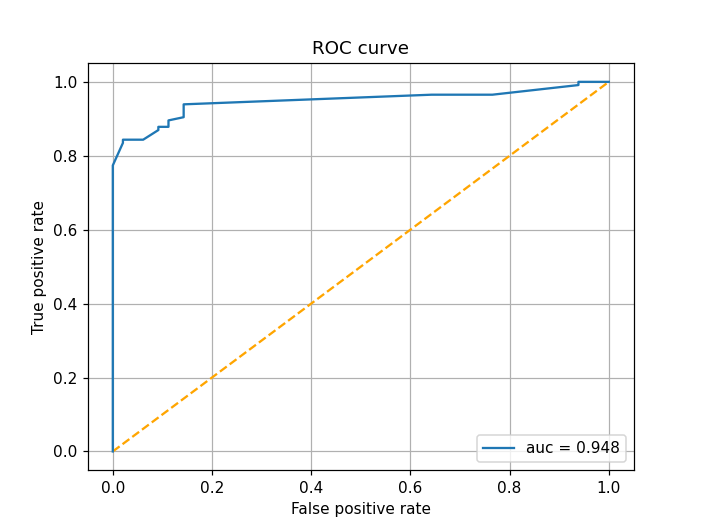

<IPython.core.display.Javascript object>


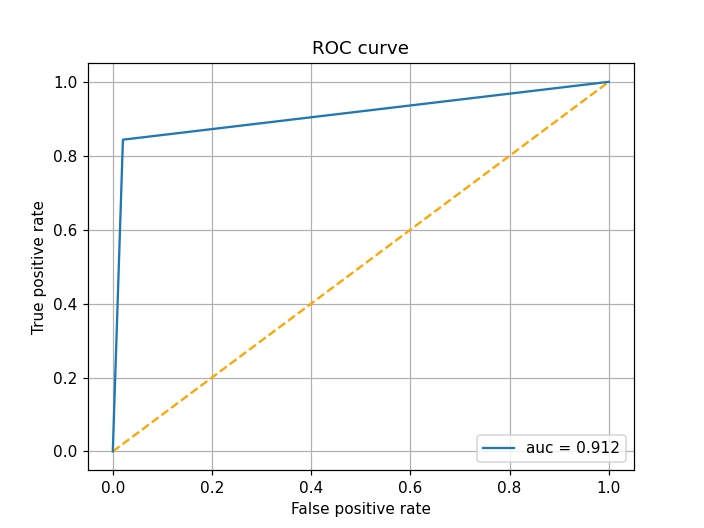

In [39]:
eval_model(test,train,arbolSummary)  
%matplotlib notebook
grafico_roc(test,arbolSummary)
grafico_roc_select_proba(test,arbolSummary,0.9)


# Selección de variables

Variables importantes 

<IPython.core.display.Javascript object>


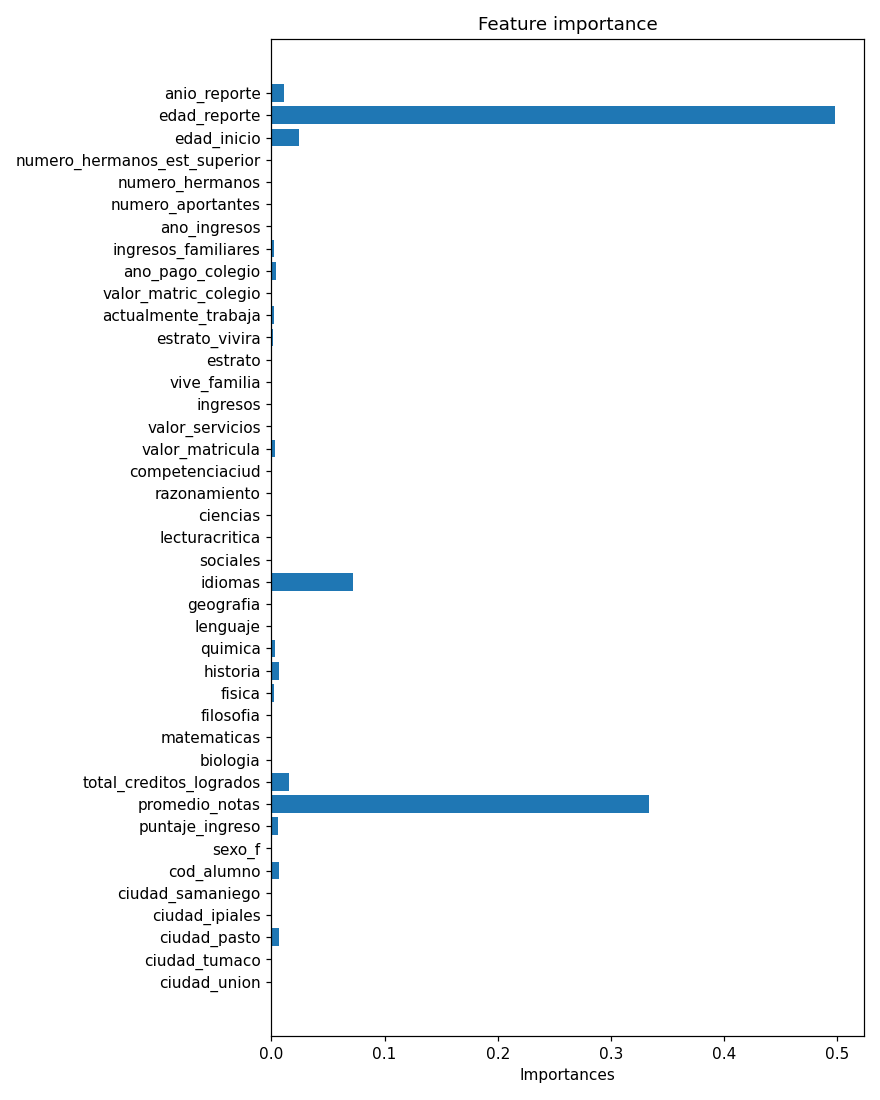

In [40]:
n=len(feature)
fig, ax = plt.subplots(figsize=(8,10))
ax.barh(range(n),arbolSummary.featureImportances.toArray())
ax.set_yticks(range(n))
ax.set_yticklabels(feature)
ax.set_xlabel('Importances')
ax.set_title('Feature importance')
plt.tight_layout()
plt.show()

In [41]:
import pandas as pd
df_imp=pd.DataFrame({'variables': feature, 'importancia': arbolSummary.featureImportances.toArray()})
df_imp.head()

,variables,importancia
0,ciudad_union,0.000000
1,ciudad_tumaco,0.000000
2,ciudad_pasto,0.006415
3,ciudad_ipiales,0.000000
4,ciudad_samaniego,0.000000


Ordenar variables de acuerdo a su importancia 

In [42]:
df_imp.sort_values(by='importancia',ascending=False)

,variables,importancia
39,edad_reporte,0.498329
8,promedio_notas,0.333746
18,idiomas,0.072046
38,edad_inicio,0.024496
9,total_creditos_logrados,0.015726
40,anio_reporte,0.010735
5,cod_alumno,0.006675
2,ciudad_pasto,0.006415
14,historia,0.006323
7,puntaje_ingreso,0.005895


Filtrar variables de poca importancia

In [43]:
df_imp_filter=df_imp[df_imp['importancia']>0]
df_imp_filter=df_imp_filter.sort_values(by='importancia',ascending=False)
df_imp_filter

,variables,importancia
39,edad_reporte,0.498329
8,promedio_notas,0.333746
18,idiomas,0.072046
38,edad_inicio,0.024496
9,total_creditos_logrados,0.015726
40,anio_reporte,0.010735
5,cod_alumno,0.006675
2,ciudad_pasto,0.006415
14,historia,0.006323
7,puntaje_ingreso,0.005895


In [44]:
important_features=df_imp_filter['variables'].to_list()
important_features

['edad_reporte',
 'promedio_notas',
 'idiomas',
 'edad_inicio',
 'total_creditos_logrados',
 'anio_reporte',
 'cod_alumno',
 'ciudad_pasto',
 'historia',
 'puntaje_ingreso',
 'ano_pago_colegio',
 'quimica',
 'valor_matricula',
 'ingresos_familiares',
 'fisica',
 'actualmente_trabaja',
 'estrato_vivira']

# Ajustar Parámetros +  variables seleccionadas

In [45]:
from pyspark.ml.feature import VectorAssembler


assembler_new = VectorAssembler(inputCols=important_features, outputCol='features')

train = assembler_new.transform(trainingData)
test = assembler_new.transform(testData)

train.select('features').take(1)
train.select('features').show(5)

+--------------------+
|            features|
+--------------------+
|[34.0,2.623913043...|
|[34.0,2.722580645...|
|[41.0,2.651086956...|
|[32.0,2.30875,-99...|
|[43.0,2.694285714...|
+--------------------+
only showing top 5 rows



In [46]:
from pyspark.ml.tuning import CrossValidator,ParamGridBuilder
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier


evaluatorB = BinaryClassificationEvaluator(labelCol='clase',rawPredictionCol='probability',metricName='areaUnderROC')

modelo_arbol = DecisionTreeClassifier(labelCol='clase',
                               featuresCol='features')


paramGrid = (ParamGridBuilder()
             .addGrid(modelo_arbol.maxDepth,[20,15])
             .addGrid(modelo_arbol.minInstancesPerNode,[5,2,10])
             .addGrid(modelo_arbol.impurity,['entropy','gini'])
             .addGrid(modelo_arbol.minInfoGain,[0.0,0.025])
             .build())


crossval = CrossValidator(estimator=modelo_arbol,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluatorB,
                          numFolds=4) 

cvModel = crossval.fit(train)

In [47]:
arbolSummary = cvModel.bestModel
#eval_model(testData,trainingData,arbolSummary,metricas[1])  
import numpy as np
cvModel.getEstimatorParamMaps()[ np.argmax(cvModel.avgMetrics) ]
print("max_depth:",arbolSummary.getMaxDepth())
print("InstancesPerNode:",arbolSummary.getMinInstancesPerNode())
print("Impurit:",arbolSummary.getImpurity())
print("InfoGain:",arbolSummary.getMinInfoGain())

max_depth: 20
InstancesPerNode: 10
Impurit: entropy
InfoGain: 0.0


____________________________________
AUC test = 0.954747
AUC train = 0.988788
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_1eff74852dcb, depth=13, numNodes=81, numClasses=2, numFeatures=17


<IPython.core.display.Javascript object>


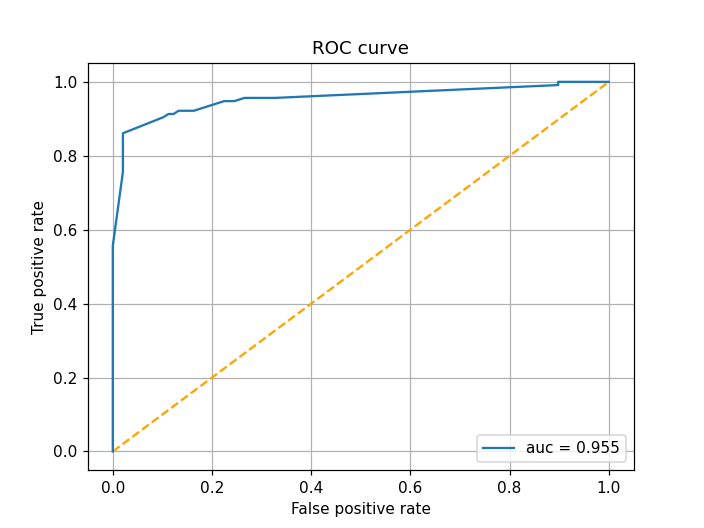

<IPython.core.display.Javascript object>


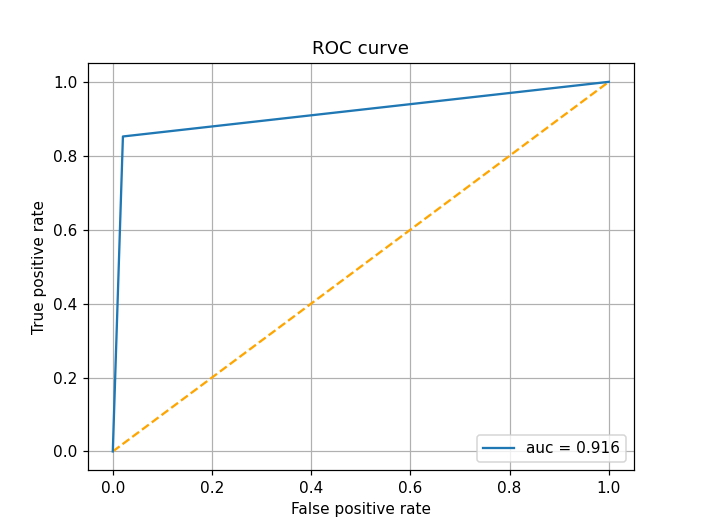

In [57]:
eval_model(test,train,arbolSummary)  
%matplotlib notebook
grafico_roc(test,arbolSummary)
grafico_roc_select_proba(test,arbolSummary,0.9)

In [50]:
print(important_features)
print(arbolSummary.toDebugString)

['edad_reporte', 'promedio_notas', 'idiomas', 'edad_inicio', 'total_creditos_logrados', 'anio_reporte', 'cod_alumno', 'ciudad_pasto', 'historia', 'puntaje_ingreso', 'ano_pago_colegio', 'quimica', 'valor_matricula', 'ingresos_familiares', 'fisica', 'actualmente_trabaja', 'estrato_vivira']
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_1eff74852dcb, depth=13, numNodes=81, numClasses=2, numFeatures=17
  If (feature 0 <= 20.5)
   If (feature 3 <= 15.5)
    If (feature 1 <= 2.8889499389499393)
     Predict: 1.0
    Else (feature 1 > 2.8889499389499393)
     If (feature 2 <= 37.504999999999995)
      Predict: 0.0
     Else (feature 2 > 37.504999999999995)
      Predict: 1.0
   Else (feature 3 > 15.5)
    Predict: 1.0
  Else (feature 0 > 20.5)
   If (feature 1 <= 2.8889499389499393)
    If (feature 2 <= -49.5)
     If (feature 1 <= 2.5)
      Predict: 1.0
     Else (feature 1 > 2.5)
      If (feature 5 <= 2006.5)
       If (feature 8 <= 11.9)
        If (feature 6 <= 9.40342025E7

# Entrenamiento total y guardar el modelo

In [51]:
from pyspark.ml.feature import VectorAssembler
assembler_final = VectorAssembler(inputCols=important_features, outputCol='features')
from pyspark.ml import Pipeline
entrenamiento = assembler_new.transform(df_procesado)
entrenamiento.select('features').take(1)
entrenamiento.select('features').show(5)



modelo_arbol = DecisionTreeClassifier(labelCol='clase',
                               featuresCol='features',
                                      maxDepth=20,
                                      minInstancesPerNode=10,
                                      impurity='entropy',
                                      minInfoGain=0.0
                                     )



# Canalizar el modelo mediante la tuberia 
#modelo_pip = Pipeline(stages=[assembler_final,modelo_arbol])



modelo=modelo_arbol.fit(entrenamiento)

# Esto ejecuta los indexadores y entrena el modelo. 

+--------------------+
|            features|
+--------------------+
|[34.0,2.623913043...|
|[34.0,2.722580645...|
|[41.0,2.651086956...|
|[32.0,2.30875,-99...|
|[43.0,2.694285714...|
+--------------------+
only showing top 5 rows



In [52]:
import joblib 

joblib.dump(important_features,'D:\\CLASES\\ELECTIVA 3 BigData\\Taller_final\\columnas_99.dat')
modelo.save(path="D:\\CLASES\\ELECTIVA 3 BigData\\Taller_final\\modelo_99_arbol")

In [53]:
modelo

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_ee64350f293c, depth=10, numNodes=79, numClasses=2, numFeatures=17